# Dataset Wrangling and EDA
This notebook is used for:
1. Consolidating various datasets into one
2. Converting the dataset into a more standard format
3. Simple feature expansion (bad name?)
4. Exploratory Data Analysis

### Declaring Imports

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Color Palette & Typeface Sizing

In [83]:
YELLOW = '#F2DC5D'
GREEN = '#9BC53D'
RED = '#C3423F'
LIGHT_BLUE = '#2596BE'
GRAY = '#666666'

AXIS_SIZE = 12
TITLE_SIZE = 16
DESCRIPTION_SIZE = 8
FIGURE_SIZE = (10*2/3,6*2/3)

Consolidating various datasets into one

## Exploratory Data Analysis
### Importing formatted dataset

In [6]:
df = pd.read_csv('../data/final.csv', dtype={'citizen': 'string', 'sex': 'string', 'age': 'string', 'decision': 'string', 'geo': 'string', 'TIME_PERIOD': 'string', 'GENCONV': "Int64", 'HUMSTAT': "Int64", 'SUB_PROT': "Int64", 'REJECTED': "Int64", 'TOTAL_APPS': "Int64", "POS_RATE": "Float64"}, keep_default_na=False, na_values=['nan'])
df

,citizen,sex,age,geo,TIME_PERIOD,GENCONV,HUMSTAT,SUB_PROT,REJECTED,TOTAL_POS,TOTAL_APPS,POS_RATE
0,AD,F,UNK,AT,2008-Q1,0,0,0,0,0,0,<NA>
1,AD,F,UNK,AT,2008-Q2,0,0,0,0,0,0,<NA>
2,AD,F,UNK,AT,2008-Q3,0,0,0,0,0,0,<NA>
3,AD,F,UNK,AT,2008-Q4,0,0,0,0,0,0,<NA>
4,AD,F,UNK,AT,2009-Q1,0,0,0,0,0,0,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
7221109,ZW,UNK,Y_LT14,UK,2019-Q3,0,0,0,0,0,0,<NA>
7221110,ZW,UNK,Y_LT14,UK,2019-Q4,0,0,0,0,0,0,<NA>
7221111,ZW,UNK,Y_LT14,UK,2020-Q1,0,0,0,0,0,0,<NA>
7221112,ZW,UNK,Y_LT14,UK,2020-Q2,0,0,0,0,0,0,<NA>


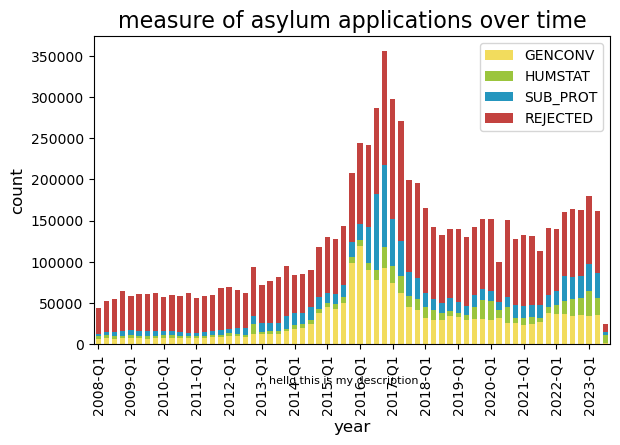

In [84]:
fig_title = "asylum-outcomes-over-times.png"
description_text="hello this is my description"

decisions_by_time = df.groupby(['TIME_PERIOD']).sum(numeric_only=True).drop("TOTAL_APPS", axis=1).drop("POS_RATE", axis=1)
decisions_by_time.plot(kind='bar', stacked=True,figsize=FIGURE_SIZE, width=0.65, color=[YELLOW, GREEN, LIGHT_BLUE, RED])

X_TICKS = 4
times = np.unique(df['TIME_PERIOD'])
plt.xticks(range(0, len(times), X_TICKS), times[::X_TICKS], rotation = 90)
plt.xlabel('year', fontsize=AXIS_SIZE)
plt.ylabel('count', fontsize=AXIS_SIZE)
plt.title('measure of asylum applications over time', fontsize=TITLE_SIZE)

plt.figtext(0.5, 0.01, description_text, wrap=True, horizontalalignment='center', fontsize=DESCRIPTION_SIZE)
plt.savefig("../figures/" + fig_title, bbox_inches="tight", pad_inches=0.4, dpi=300, transparent=False)
plt.show()

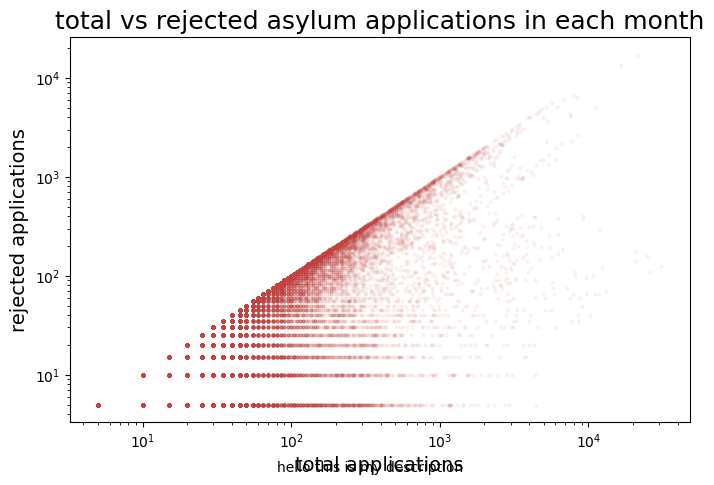

In [78]:
fig_title = "rejected-apps-vs-total-by-month.png"
description_text="hello this is my description"

df.plot.scatter('TOTAL_APPS','REJECTED',figsize=FIGURE_SIZE,alpha=0.05,s=4,c=RED) # alpha=0.1,s=10
#add coloring by country or time period
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('total applications', fontsize=AXIS_SIZE)
plt.ylabel('rejected applications', fontsize=AXIS_SIZE)
plt.title("total vs rejected asylum applications in each month", fontsize=TITLE_SIZE)


plt.figtext(0.5, 0.01, description_text, wrap=True, horizontalalignment='center', fontsize=DESCRIPTION_SIZE)
plt.savefig("../figures/" + fig_title, bbox_inches="tight", pad_inches=0.4, dpi=300, transparent=False)
plt.show()

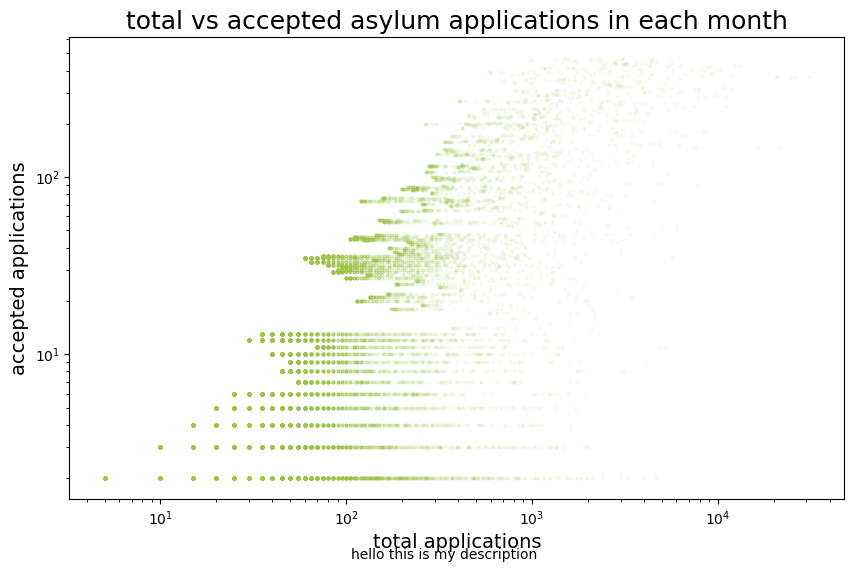

In [75]:
fig_title = "accepted-apps-vs-total-by-month.png"
description_text="hello this is my description"

df.plot.scatter('TOTAL_APPS','TOTAL_POS',figsize=FIGURE_SIZE,alpha=0.05,s=4,c=GREEN) # alpha=0.1,s=10
#add coloring by country or time period
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('total applications', fontsize=AXIS_SIZE)
plt.ylabel('accepted applications', fontsize=AXIS_SIZE)
plt.title("total vs accepted asylum applications in each month", fontsize=TITLE_SIZE)

plt.figtext(0.5, 0.01, description_text, wrap=True, horizontalalignment='center', fontsize=DESCRIPTION_SIZE)
plt.savefig("../figures/" + fig_title, bbox_inches="tight", pad_inches=0.4, dpi=300, transparent=False)
plt.show()